In [1]:
#regressao linear simples

In [2]:
#importacao das bibliotecas, sklearn para criar o modelo de regressao e yellowbrick para visualizacao de residuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#warning
from yellowbrick.regressor import ResidualsPlot

In [3]:
#carregamento da base de dados e exclusao da primeira coluna
base = pd.read_csv('cars.csv')
base.shape

(50, 3)

In [4]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [5]:
base = base.drop(['Unnamed: 0'], axis=1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [6]:
#definicao de variaveis x e y, x é a distancia e a variavel independente e y é a velocidade e a variavel dependente
x = base.iloc[:,1].values # [:,1] todos os registros na coluna 1
y = base.iloc[:,0].values # [:,0] todos os registros na coluna 0
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

In [7]:
#calculo da correlacao entre x e y
correlacao = np.corrcoef(x, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [8]:
#formato de matriz com uma coluna a mais
x = x.reshape(-1,1)# colocando os valores entre colchetes.
#criacao do modelo e treinamento (fit indica que o treinamento deve ser ajustado)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [17]:
x

array([[  2],
       [ 10],
       [  4],
       [ 22],
       [ 16],
       [ 10],
       [ 18],
       [ 26],
       [ 34],
       [ 17],
       [ 28],
       [ 14],
       [ 20],
       [ 24],
       [ 28],
       [ 26],
       [ 34],
       [ 34],
       [ 46],
       [ 26],
       [ 36],
       [ 60],
       [ 80],
       [ 20],
       [ 26],
       [ 54],
       [ 32],
       [ 40],
       [ 32],
       [ 40],
       [ 50],
       [ 42],
       [ 56],
       [ 76],
       [ 84],
       [ 36],
       [ 46],
       [ 68],
       [ 32],
       [ 48],
       [ 52],
       [ 56],
       [ 64],
       [ 66],
       [ 54],
       [ 70],
       [ 92],
       [ 93],
       [120],
       [ 85]], dtype=int64)

In [9]:
#visualizacao dos coeficientes
modelo.intercept_

8.283905641787172

In [10]:
#inclinacao
modelo.coef_

array([0.16556757])

Text(0, 0.5, 'Velocidade')

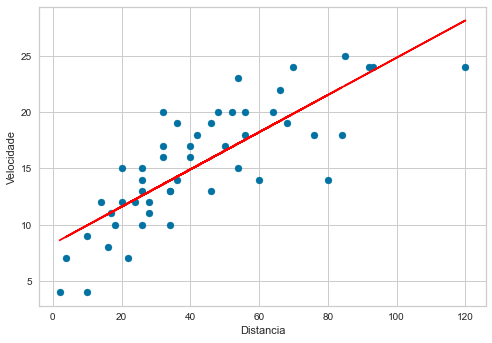

In [11]:
#geracao do grafico com os pontos reais e as previsoes
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color='red')
plt.xlabel('Distancia')
plt.ylabel('Velocidade')

In [12]:
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [13]:
#previsao da distancia 22 pes usando a formula manual
#interceptacao + inclinacao * valor dist
#qual a velocidade se levou 22 pes para parar
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [14]:
#previsao utilizando a funcao sklearn
modelo.predict([[22]])

array([11.92639228])

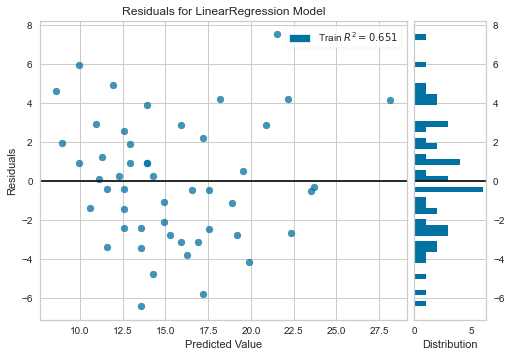

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
#grafico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()